In [2]:
import os
os.chdir('../..')

In [24]:
from classes.helpers import *
import numpy as np
import json
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

colors = {'ba': 'b', 'rb': 'r'}
labels = {'ba': 'BeerAdvocate', 'rb': 'RateBeer'}

notext = {'ba': 'nan', 'rb': ''}

data_folder = '../data/'

# Plot some histograms

# Histograms on raw ratings

## All the ratings

In [58]:
ratings = {'ba': [], 'rb': []}

for key in ratings.keys():
    print('Parse {} ratings'.format(key.upper()))
    gen = parse(data_folder + key + '/ratings_valid.txt.gz')
    
    for item in gen:        
        ratings[key].append(float(item['rating']))

Parse BA ratings
Parse RB ratings


In [59]:
print(len(ratings['ba']))
print(len(ratings['rb']))

2715712
7121626


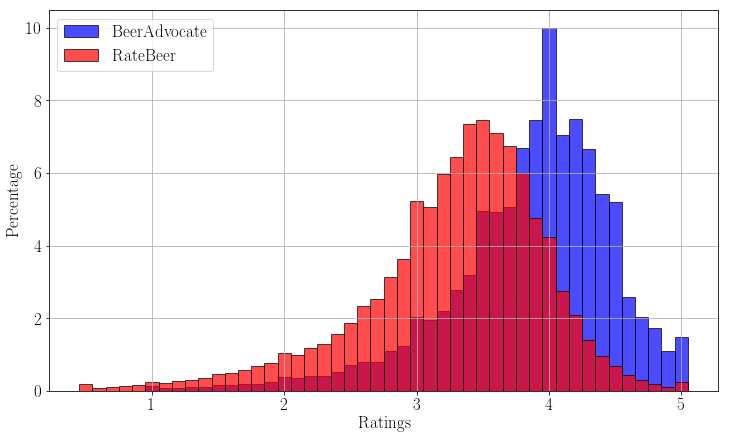

In [51]:
nbr_bins = 45

bin_edges = {'ba': None, 'rb': None}
hist = {'ba': None, 'rb': None}

for key in colors.keys():
    a, bin_edges[key] = np.histogram(ratings[key], range=(0.5, 5), bins=nbr_bins)
    hist[key], a = np.histogram(ratings[key], range=(0.5, 5), bins=nbr_bins+1)
    hist[key] = hist[key]/np.sum(hist[key])*100
    
plt.figure(figsize=(12,7))
plt.rc('font', family='serif')
plt.rc('font', size=17)

for key in hist.keys():
    width = bin_edges[key][1] - bin_edges[key][0]
    plt.bar(bin_edges[key], hist[key], width = width, facecolor=colors[key], edgecolor='k', alpha=0.7, label=labels[key])
    
plt.grid()
plt.legend()
plt.ylabel('Percentage')
plt.xlabel('Ratings')

## Ratings from matching beers

In [53]:
ratings = {'ba': [], 'rb': []}

for key in ratings.keys():
    print('Parse {} ratings'.format(key.upper()))
    gen = parse(data_folder + 'matched/ratings_valid_{}.txt.gz'.format(key))
    
    for item in gen:
        ratings[key].append(float(item['rating']))

Parse BA ratings
Parse RB ratings


In [55]:
print(len(ratings['ba']))
print(len(ratings['rb']))

289025

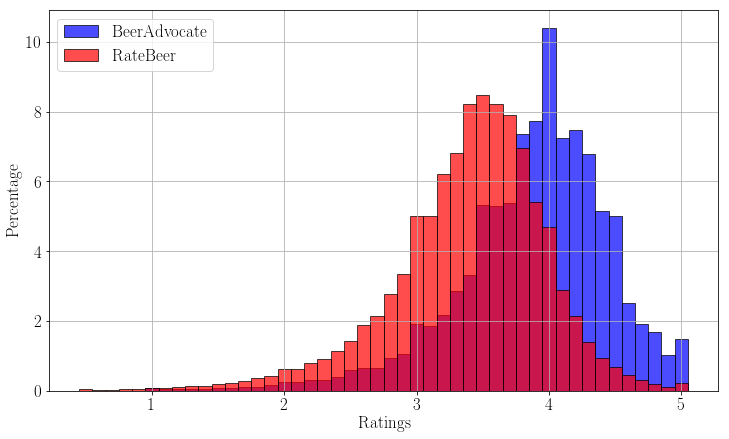

In [54]:
nbr_bins = 45

bin_edges = {'ba': None, 'rb': None}
hist = {'ba': None, 'rb': None}

for key in colors.keys():
    a, bin_edges[key] = np.histogram(ratings[key], range=(0.5, 5), bins=nbr_bins)
    hist[key], a = np.histogram(ratings[key], range=(0.5, 5), bins=nbr_bins+1)
    hist[key] = hist[key]/np.sum(hist[key])*100
    
plt.figure(figsize=(12,7))
plt.rc('font', family='serif')
plt.rc('font', size=17)

for key in hist.keys():
    width = bin_edges[key][1] - bin_edges[key][0]
    plt.bar(bin_edges[key], hist[key], width = width, facecolor=colors[key], edgecolor='k', alpha=0.7, label=labels[key])
    
plt.grid()
plt.legend()
plt.ylabel('Percentage')
plt.xlabel('Ratings')

## Histogram on the average of the beers

In [62]:
ratings = {}
ratings['ba'] = pd.read_csv('../data/ba/beers.csv')['avg_computed']
ratings['rb'] = pd.read_csv('../data/rb/beers.csv')['avg_computed']

/home/gayouf/Applications/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/home/gayouf/Applications/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


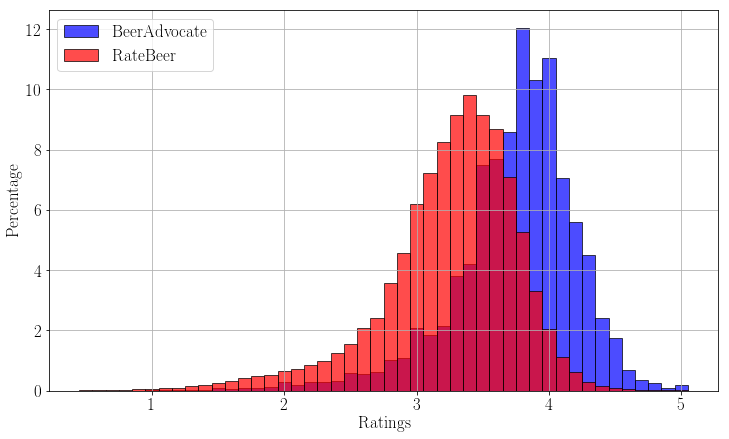

In [63]:
df = {}
nbr_bins = 45

bin_edges = {'ba': None, 'rb': None}
hist = {'ba': None, 'rb': None}

for key in colors.keys():
    a, bin_edges[key] = np.histogram(ratings[key], range=(0.5, 5), bins=nbr_bins)
    hist[key], a = np.histogram(ratings[key], range=(0.5, 5), bins=nbr_bins+1)
    hist[key] = hist[key]/np.sum(hist[key])*100
    
plt.figure(figsize=(12,7))
plt.rc('font', family='serif')
plt.rc('font', size=17)

for key in hist.keys():
    width = bin_edges[key][1] - bin_edges[key][0]
    plt.bar(bin_edges[key], hist[key], width = width, facecolor=colors[key], edgecolor='k', alpha=0.7, label=labels[key])
    
plt.grid()
plt.legend()
plt.ylabel('Percentage')
plt.xlabel('Ratings')

## Histogram on the average rating of the matched beers

In [64]:
ratings = {}
ratings['ba'] = pd.read_csv('../data/matched/beers.csv', header=[0,1])['ba']['avg_matched_valid_ratings']
ratings['rb'] = pd.read_csv('../data/matched/beers.csv', header=[0,1])['rb']['avg_matched_valid_ratings']

/home/gayouf/Applications/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/home/gayouf/Applications/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


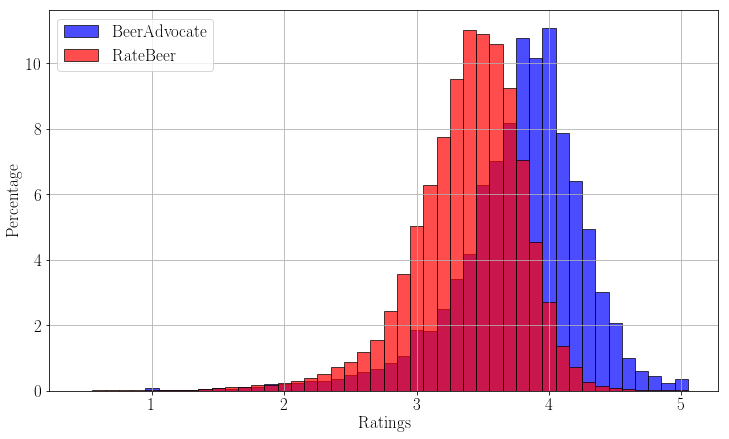

In [65]:
df = {}
nbr_bins = 45

bin_edges = {'ba': None, 'rb': None}
hist = {'ba': None, 'rb': None}

for key in colors.keys():
    a, bin_edges[key] = np.histogram(ratings[key], range=(0.5, 5), bins=nbr_bins)
    hist[key], a = np.histogram(ratings[key], range=(0.5, 5), bins=nbr_bins+1)
    hist[key] = hist[key]/np.sum(hist[key])*100
    
plt.figure(figsize=(12,7))
plt.rc('font', family='serif')
plt.rc('font', size=17)

for key in hist.keys():
    width = bin_edges[key][1] - bin_edges[key][0]
    plt.bar(bin_edges[key], hist[key], width = width, facecolor=colors[key], edgecolor='k', alpha=0.7, label=labels[key])
    
plt.grid()
plt.legend()
plt.ylabel('Percentage')
plt.xlabel('Ratings')

## Histogram on the average z-score of the matched beers

In [34]:
ratings = {}
ratings['ba'] = pd.read_csv('../data/matched/beers.csv', header=[0,1])['ba']['zscore']
ratings['rb'] = pd.read_csv('../data/matched/beers.csv', header=[0,1])['rb']['zscore']

In [39]:
np.nanmean((ratings['ba']-np.nanmean(ratings['ba']))/(np.std(ratings['ba'])))

-3.527579673625916e-18

/home/gayouf/Applications/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/home/gayouf/Applications/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


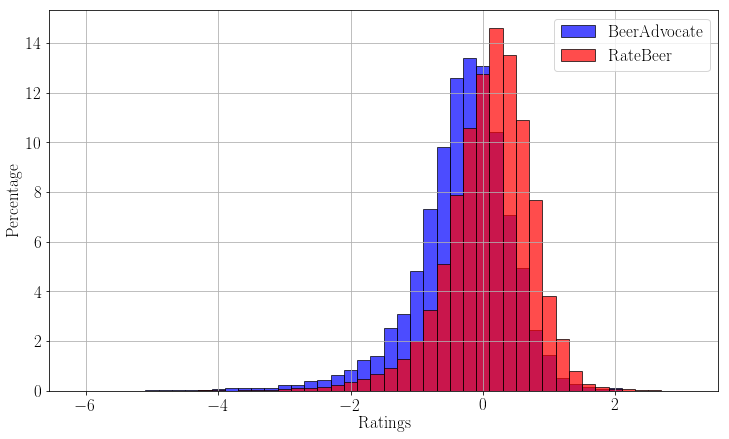

In [35]:
df = {}
nbr_bins = 45

bin_edges = {'ba': None, 'rb': None}
hist = {'ba': None, 'rb': None}

for key in colors.keys():
    a, bin_edges[key] = np.histogram(ratings[key], range=(-6, 3), bins=nbr_bins)
    hist[key], a = np.histogram(ratings[key], range=(-6, 3), bins=nbr_bins+1)
    hist[key] = hist[key]/np.sum(hist[key])*100
    
plt.figure(figsize=(12,7))
plt.rc('font', family='serif')
plt.rc('font', size=17)

for key in hist.keys():
    width = bin_edges[key][1] - bin_edges[key][0]
    plt.bar(bin_edges[key], hist[key], width = width, facecolor=colors[key], edgecolor='k', alpha=0.7, label=labels[key])
    
plt.grid()
plt.legend()
plt.ylabel('Percentage')
plt.xlabel('Ratings')

In [40]:
ratings = {}
ratings['ba'] = pd.read_csv('../data/matched/beers.csv', header=[0,1])['ba']['avg_computed']
ratings['ba'] = (ratings['ba']-np.nanmean(ratings['ba']))/(np.std(ratings['ba']))
ratings['rb'] = pd.read_csv('../data/matched/beers.csv', header=[0,1])['rb']['zscore']
ratings['rb'] = (ratings['rb']-np.nanmean(ratings['rb']))/(np.std(ratings['rb']))


/home/gayouf/Applications/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:747: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/home/gayouf/Applications/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


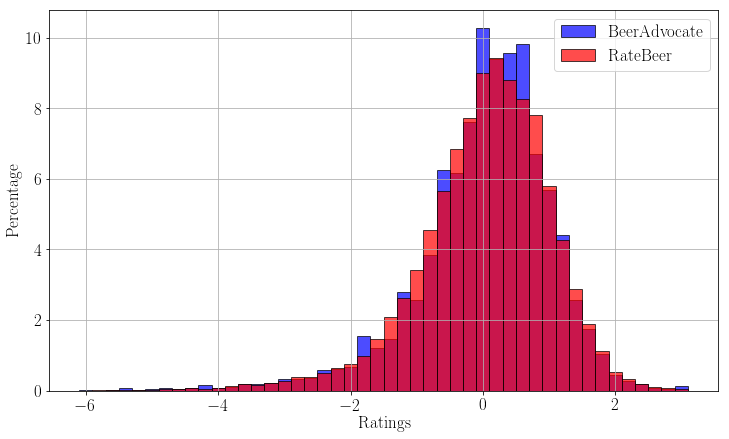

In [41]:
df = {}
nbr_bins = 45

bin_edges = {'ba': None, 'rb': None}
hist = {'ba': None, 'rb': None}

for key in colors.keys():
    a, bin_edges[key] = np.histogram(ratings[key], range=(-6, 3), bins=nbr_bins)
    hist[key], a = np.histogram(ratings[key], range=(-6, 3), bins=nbr_bins+1)
    hist[key] = hist[key]/np.sum(hist[key])*100
    
plt.figure(figsize=(12,7))
plt.rc('font', family='serif')
plt.rc('font', size=17)

for key in hist.keys():
    width = bin_edges[key][1] - bin_edges[key][0]
    plt.bar(bin_edges[key], hist[key], width = width, facecolor=colors[key], edgecolor='k', alpha=0.7, label=labels[key])
    
plt.grid()
plt.legend()
plt.ylabel('Percentage')
plt.xlabel('Ratings')